In [1]:
from gates import *
from states import *
from measurements import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import cma

Done


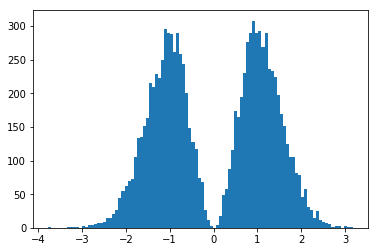

In [2]:
n_photons = 3
state1 = np.zeros(n_photons)
state1[0] = 1.
state2 = np.zeros(n_photons)
state2[0] = 1.
state3 = np.zeros(n_photons)
state3[1] = 1.
state = np.kron(state2, state3)
state = np.kron(state1, state)
data = meas_X_theta(state, 0., 3, n_photons)
plt.hist(data[:,2], bins=100)
print('Done')

# Initialization

In [3]:
n_photons = 8
# 1
vacuum_state1 = np.zeros(n_photons)
vacuum_state1[0] = 1.
# 2
vacuum_state2 = np.zeros(n_photons)
vacuum_state2[0] = 1.

state = np.kron(vacuum_state1, vacuum_state2)


# 1
# from vacuum state to displaced squeezed state
coh_dis = [0.5, 0.2, 0.3, 0.3] # squeezed r*np.exp(i*phi)  and coherent |alpha|*np.exp(i*args(alpha))
gate1_1 = S_gate(coh_dis[0], coh_dis[1], 1, 2, n_photons) 
gate1_2 = D_gate(coh_dis[2], coh_dis[3], 1, 2, n_photons)

# 2
coh_dis = [0.3, 0.4, 0.5, 0.7] # squeezed r*np.exp(i*phi)  and coherent |alpha|*np.exp(i*args(alpha))
gate2_1 = S_gate(coh_dis[0], coh_dis[1], 2, 2, n_photons) 
gate2_2 = D_gate(coh_dis[2], coh_dis[3], 2, 2, n_photons)


state_ = np.einsum('jk,k->j', gate1_1, state)
state_ = np.einsum('jk,k->j', gate1_2, state_)
state_ = np.einsum('jk,k->j', gate2_1, state_)
init_state = np.einsum('jk,k->j', gate2_2, state_)

In [4]:
init_state

array([ 7.46886765e-01+2.89587588e-02j,  3.15056969e-01+6.81443387e-02j,
       -1.46863224e-01-2.06086685e-02j, -1.45184926e-01-6.02396145e-02j,
        2.41126134e-02+1.00314302e-03j,  6.38156825e-02+3.81622521e-02j,
       -9.19090941e-03+2.21653882e-03j, -1.84983006e-02-2.11949529e-02j,
        3.81477160e-01+2.23519557e-01j,  1.45310683e-01+1.23457651e-01j,
       -7.08495298e-02-5.17304984e-02j, -5.89153344e-02-7.19327146e-02j,
        1.22966302e-02+7.25173069e-03j,  2.26357041e-02+3.77119800e-02j,
       -5.41226994e-03-1.40858895e-03j, -3.73390798e-03-1.62166390e-02j,
       -4.28256781e-02+9.23598379e-02j, -2.50949331e-02+3.60255429e-02j,
        1.02956280e-02-1.73785807e-02j,  1.51889468e-02-1.50883741e-02j,
       -1.39116771e-03+2.97818007e-03j, -8.14488274e-03+6.01904823e-03j,
        2.03599436e-04-1.27153367e-03j,  3.63459935e-03-1.21312272e-03j,
       -9.05159733e-02-6.35415067e-02j, -3.36934810e-02-3.37556179e-02j,
        1.66015408e-02+1.43483118e-02j,  1.32123180

In [5]:
def circuit(state, params, n_photons):
    gate1_1 = D_gate(params[0], params[1], 1, 2, n_photons) 
    gate1_2 = S_gate(params[2], params[3], 1, 2, n_photons)
    gate2_1 = D_gate(params[4], params[5], 2, 2, n_photons) 
    gate2_2 = S_gate(params[6], params[7], 2, 2, n_photons)
    state_ = np.einsum('jk,k->j', gate1_1, state)
    state_ = np.einsum('jk,k->j', gate1_2, state_)
    state_ = np.einsum('jk,k->j', gate2_1, state_)
    final_state = np.einsum('jk,k->j', gate2_2, state_)
    data_X = meas_X(final_state, 2, n_photons)
    data_P = meas_P(final_state, 2, n_photons)
    return data_X, data_P, final_state

def loss_xy(x1, p1, x2, p2):
    H = np.zeros(x1.shape[0]**2, dtype=np.float32)
    dimension = x1.shape[0]
    for i in range(dimension):
        H[i*dimension:(i+1)*dimension] = (x1**2 + x2**2 + p1[i]**2 + p2[i]**2)/2.
    return np.mean(H) # + np.std(H)

In [6]:
params = [0,1,1,0,0,1,0,0]
data = meas_X(state, 2, n_photons)
data_X, data_P, state = circuit(state, params, n_photons)
loss_xy(data_X[:,0], data_P[:,0], data_X[:,1], data_P[:,1])

2.2523518

In [7]:
def func_to_opt(params):
    X, P, _ = circuit(init_state, params, n_photons)
    return loss_xy(X[:,0], P[:,0], X[:,1], P[:,1])

In [8]:
es = cma.CMAEvolutionStrategy(8*[0.5], 0.4)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=730264, Tue Jan 21 14:50:07 2020)


In [ ]:
es.optimize(func_to_opt,iterations=1000)

In [ ]:
n_photons = 8
# 1
vacuum_state1 = np.zeros(n_photons)
vacuum_state1[0] = 1.
# 2
vacuum_state2 = np.zeros(n_photons)
vacuum_state2[0] = 1.

state = np.kron(vacuum_state1, vacuum_state2)

data_X = meas_X(state, 2, n_photons)
data_P = meas_P(state, 2, n_photons)

print('final wanted loss ------- ', loss_xy(data_X[:,0], data_P[:,0], data_X[:,1], data_P[:,1]))